In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,NaN,2.79240,2.7763,1.69910,NaN,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,NaN,3.2167,2.92360,NaN,0.641450
2,-0.169460,0.50153,2.470900,3.06500,NaN,1.48240,0.92160,2.64240,1.5187,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,NaN,2.59570,2.89330,1.53750,NaN,3.65930,0.618250,NaN
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.3140,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,NaN,1.576000,0.55612,0.070769,2.07470,NaN,3.22290,3.4933,1.32550,3.231100,0.005387
796,3.466600,-4.03460,NaN,1.34610,1.377300,2.28870,0.39613,2.39610,NaN,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.4954,1.34330,1.622500,1.585300
798,3.441400,NaN,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,NaN,0.95112,1.884500,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	156
float64		column 2	182
float64		column 3	156
float64		column 4	159
float64		column 5	185
float64		column 6	159
float64		column 7	130
float64		column 8	107
float64		column 9	211
float64		column 10	182
float64		column 11	78
float64		column 12	185


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,644.000000,618.000000,644.000000,641.000000,615.000000,641.000000,670.000000,693.000000,589.000000,618.000000,722.000000,615.000000
mean,1.571801,1.305723,1.956942,1.953742,1.985710,1.997036,1.937145,2.016537,1.973136,1.981867,1.944152,1.964369
std,2.698764,3.502653,1.110307,1.126035,1.128163,1.106585,1.145980,1.114152,1.097162,1.122631,1.171183,1.071968
min,-4.692600,-6.952900,0.023586,0.004051,0.021103,0.002230,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.344435,-0.525427,1.040950,1.020900,1.027250,1.084900,0.957522,1.063500,1.100300,1.064075,0.895170,1.097950
50%,1.712100,0.560365,1.949900,1.926800,2.014500,1.984600,1.942050,2.027700,1.991100,1.996300,1.908000,1.939100
75%,3.975200,4.389900,2.806975,2.912500,2.833950,2.903400,2.891950,2.891200,2.913600,2.910250,2.963550,2.792750
max,6.982200,8.018800,3.992600,3.997300,3.988600,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

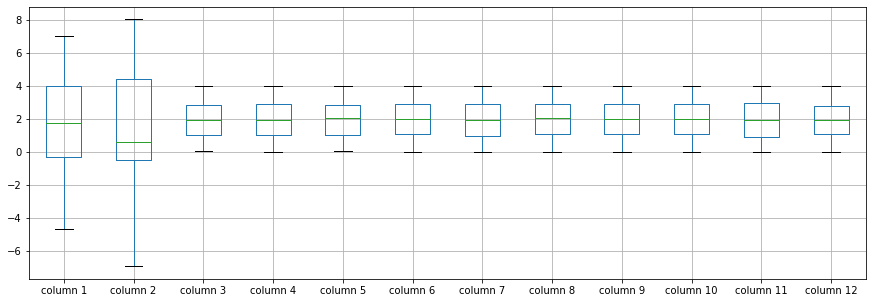

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.571801
column 2     1.305723
column 3     1.956942
column 4     1.953742
column 5     1.985710
column 6     1.997036
column 7     1.937145
column 8     2.016537
column 9     1.973136
column 10    1.981867
column 11    1.944152
column 12    1.964369
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.433627,-0.029336,0.044804,0.083361,0.024006,0.009403,0.023682,-0.009256,0.032307,0.042320,0.037784
column 2,-0.433627,1.000000,-0.000175,-0.024508,-0.049127,-0.031095,-0.026247,0.005805,-0.022450,-0.006112,-0.128142,0.007619
column 3,-0.029336,-0.000175,1.000000,-0.054723,0.072773,0.013041,-0.000139,0.071660,-0.009205,-0.007088,-0.028852,-0.005637
column 4,0.044804,-0.024508,-0.054723,1.000000,0.033964,-0.039355,0.019567,0.039357,-0.034728,0.001594,0.065350,0.025902
column 5,0.083361,-0.049127,0.072773,0.033964,1.000000,0.029655,0.040523,0.011686,-0.082756,0.004057,-0.005479,0.015593
column 6,0.024006,-0.031095,0.013041,-0.039355,0.029655,1.000000,-0.055130,0.006320,-0.024525,-0.006723,-0.018921,0.045780
column 7,0.009403,-0.026247,-0.000139,0.019567,0.040523,-0.055130,1.000000,-0.064133,0.020471,-0.074886,-0.021206,-0.068423
column 8,0.023682,0.005805,0.071660,0.039357,0.011686,0.006320,-0.064133,1.000000,-0.024182,-0.127755,0.002110,-0.035123
column 9,-0.009256,-0.022450,-0.009205,-0.034728,-0.082756,-0.024525,0.020471,-0.024182,1.000000,0.053763,-0.018411,-0.035619
column 10,0.032307,-0.006112,-0.007088,0.001594,0.004057,-0.006723,-0.074886,-0.127755,0.053763,1.000000,-0.072747,0.074120


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+55,12+55+55,12+55+55,12+55+55+55+55,12+55+55+55,12+55+55,12+55,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 23.403879623413086
Epoch: 1 , loss: 23.24360939025879
Epoch: 2 , loss: 22.803286056518555
Epoch: 3 , loss: 20.423563899993898
Epoch: 4 , loss: 18.495662231445312
Epoch: 5 , loss: 18.048860301971434
Epoch: 6 , loss: 17.46639596939087
Epoch: 7 , loss: 17.35488105773926
Epoch: 8 , loss: 17.092229080200195
Epoch: 9 , loss: 16.66528148651123
Epoch: 10 , loss: 16.525304946899414
Epoch: 11 , loss: 16.430563068389894
Epoch: 12 , loss: 16.396692485809325
Epoch: 13 , loss: 16.265350551605223
Epoch: 14 , loss: 16.07407165527344
Epoch: 15 , loss: 15.854223117828369
Epoch: 16 , loss: 15.916604957580567
Epoch: 17 , loss: 15.923782291412353
Epoch: 18 , loss: 15.756584911346435
Epoch: 19 , loss: 15.74136999130249
Epoch: 20 , loss: 15.625951385498047
Epoch: 21 , loss: 15.551099071502685
Epoch: 22 , loss: 15.69572473526001
Epoch: 23 , loss: 15.618715209960937
Epoch: 24 , loss: 15.527269229888915
Epoch: 25 , loss: 15.620

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.127876
column 2     0.042845
column 3     1.521097
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     1.525552
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,-2.414506,0.000000,0.000000,0.0,-2.839498,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.185162,0.000000,0.0,0.697595,0.000000
2,0.000000,0.000000,0.00000,0.000000,0.340218,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.000000,-0.556302,0.0,0.000000,0.000000,1.227636,0.0,0.000000,-1.020011
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,-3.050631,3.219029,0.00000,0.000000,0.000000,0.0,0.168426,0.000000,0.000000,0.0,0.000000,0.000000
796,0.000000,0.000000,-1.23415,0.000000,0.000000,0.0,0.000000,0.000000,-0.684070,0.0,0.000000,0.000000
797,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
798,0.000000,5.553775,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,-0.474581,0.0,0.000000,-0.449530


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(88.45932386474271, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.35637179994367496

In [18]:
new_df.iloc[66,:]

column 1     0.207620
column 2    -0.550520
column 3     2.339900
column 4     1.794800
column 5     1.401300
column 6     2.765800
column 7     1.304100
column 8     1.249300
column 9     1.799157
column 10    1.284300
column 11    1.879400
column 12    0.575240
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.533700,0.469590,0.67908,1.019894,2.792400,2.776300,1.69910,0.976102,1.746400
1,-0.098505,-0.178570,2.062800,2.921600,0.424720,1.17850,1.680200,1.573962,3.216700,2.92360,1.470505,0.641450
2,-0.169460,0.501530,2.470900,3.065000,1.907818,1.48240,0.921600,2.642400,1.518700,2.53180,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.956300,2.230698,2.59570,2.893300,1.537500,2.227056,3.65930,0.618250,2.245789
4,0.098830,0.234180,0.429700,1.631200,3.554100,2.27110,0.374250,2.178600,1.314000,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.718369,0.532329,1.576000,0.556120,0.070769,2.07470,0.971466,3.222900,3.493300,1.32550,3.231100,0.005387
796,3.466600,-4.034600,1.866250,1.346100,1.377300,2.28870,0.396130,2.396100,1.779430,1.66750,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.264600,3.341200,1.53700,1.225600,0.740270,2.495400,1.34330,1.622500,1.585300
798,3.441400,0.337475,1.577000,1.844000,1.098700,3.42430,0.810810,3.727000,0.713319,0.95112,1.884500,0.694170


In [20]:
imputations[-1].to_excel("4-gauss_NE_20(imp).xlsx", index=False, header=False)